Importing all the required packages

In [1]:

import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle



**NOTE** : Please enter Category Names same as folder name

In [2]:
image_folder = "./datasets"
Categories=[f for f in os.listdir(image_folder) if os.path.isdir(os.path.join(image_folder, f))]
# print("Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball");

# while(True):
#   check=input()
#   if(check=='n' or check=='y'):
#     break
#   print("Please give a valid input (y/n)")
# if(check=='y'):
#   print("Enter How Many types of Images do you want to classify")
#   n=int(input())
#   Categories=[]
#   print(f'please enter {n} names')
#   for i in range(n):
#     name=input()
#     Categories.append(name)
#   print(f"If not drive Please upload all the {n} category images in google collab with the same names as given in categories")



Loading all the images and creating a DataFrame

If you have your images in your google drive, simply mount the google Drive and copy the path of the folder containing all the Category images and Change the datadir variable to that path

In [3]:
import re
# Menggunakan regex untuk memuat file dengan ekstensi selain .png
jpg_pattern = re.compile(r'.*\.(jpg|jpeg)$', re.IGNORECASE)


In [4]:
from skimage import io, transform
import glob
from skimage.feature import hog

data = []
target = []

for label_id, label in enumerate(Categories):    
    image_paths = glob.glob(os.path.join(image_folder, label, "*"))
    image_paths = [image_path for image_path in image_paths if jpg_pattern.match(image_path)]
    for image_path in image_paths:
        image = io.imread(image_path, as_gray=True)
        image = transform.resize(image, (128, 128))  # Resizing gambar
        fd = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False)
        data.append(fd)
        target.append(label_id)

Splitting the data into training and testing data

In [5]:
# x=df.iloc[:,:-1]
# y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.20,random_state=42,stratify=target)
print('Splitted Successfully')

Splitted Successfully


This Part of code may take a while for training the data using SVC model

In [6]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Predicting our testing data

In [7]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([1, 3, 7, 4, 3, 5, 5, 7, 1, 1, 2, 5, 6, 0, 7, 4, 5, 0, 5, 0, 3, 7,
       2, 0, 1, 4, 1, 0, 4, 0, 0, 2, 3, 3, 3, 7, 4, 4, 3, 2, 1, 0, 2, 6,
       1, 2, 3, 4, 3, 6, 3, 4, 4, 3, 6, 2, 3, 7, 3, 1, 2, 3, 0, 4, 1, 0,
       1, 6, 4, 6, 3, 7, 4, 3, 4, 0, 1, 4, 1, 6, 3, 2, 3, 5, 6, 1, 3, 6,
       3, 3, 1, 1, 2, 4, 1, 5, 1, 6, 5, 3, 4, 1, 6, 6, 0, 7, 2, 3, 7, 4,
       7, 4, 1, 3, 4, 4, 3, 3, 1, 6, 1, 4, 3, 2, 6, 6, 2, 7, 3, 3, 7, 3,
       7, 5, 0, 1, 3, 4, 2, 6, 2, 7, 4, 0, 2, 3, 3, 7, 4, 6, 1, 0, 5, 3,
       3, 1, 6, 4, 0, 3, 2, 1, 5, 6, 1, 2, 3, 6, 5, 5, 3, 2, 7, 2, 6, 3,
       7, 0, 5, 2, 3, 2, 7, 3, 4, 4, 1, 4, 5, 6, 6, 3, 1, 3, 3, 3, 0, 5,
       2, 7, 4, 1, 3, 6, 4, 2, 2, 2, 4, 6, 4, 6, 3, 5, 7, 2, 2, 2, 2, 4,
       2, 5, 3, 5, 3, 2, 1, 4, 4, 3, 2, 1, 3, 2, 3, 1, 3, 6, 0, 6, 3, 7,
       1, 1, 3, 2, 4, 0, 6, 1, 4, 5, 1, 5, 6, 6, 4, 3, 3, 0, 5, 4, 1, 2,
       4, 3, 7, 2, 6, 5, 1, 2, 3, 1, 1, 6, 4, 7, 1, 6, 0, 5, 1, 4, 5, 4,
       1, 3, 7, 0, 6, 4, 6, 2, 5])

In [8]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([1, 3, 6, 6, 6, 2, 1, 1, 0, 6, 1, 5, 5, 4, 5, 4, 6, 2, 5, 1, 7, 7,
       2, 0, 1, 4, 0, 6, 4, 7, 3, 2, 0, 3, 4, 7, 4, 1, 3, 6, 0, 2, 2, 0,
       2, 2, 0, 4, 3, 2, 3, 0, 5, 0, 0, 2, 4, 7, 3, 6, 2, 3, 0, 1, 2, 0,
       1, 7, 5, 0, 6, 2, 3, 3, 3, 6, 0, 4, 0, 1, 0, 7, 6, 5, 0, 3, 3, 6,
       5, 0, 1, 4, 7, 1, 2, 7, 5, 7, 5, 0, 2, 5, 1, 6, 0, 0, 5, 4, 7, 1,
       6, 3, 2, 4, 6, 0, 4, 3, 5, 4, 1, 5, 0, 2, 5, 6, 5, 7, 0, 4, 7, 4,
       7, 5, 2, 2, 3, 5, 2, 3, 5, 4, 4, 1, 7, 3, 3, 4, 4, 6, 6, 3, 5, 0,
       0, 7, 7, 4, 7, 6, 1, 1, 7, 4, 7, 2, 6, 3, 7, 5, 3, 2, 4, 2, 6, 4,
       7, 0, 7, 2, 0, 5, 2, 7, 4, 4, 1, 5, 5, 6, 7, 3, 4, 1, 3, 6, 7, 1,
       2, 0, 7, 2, 3, 1, 4, 1, 2, 6, 4, 1, 0, 4, 3, 1, 7, 2, 6, 6, 2, 7,
       2, 5, 7, 1, 3, 1, 1, 3, 2, 3, 2, 2, 3, 2, 6, 6, 3, 5, 6, 6, 3, 7,
       5, 3, 4, 1, 3, 7, 5, 1, 6, 5, 6, 6, 3, 1, 3, 7, 3, 4, 6, 4, 0, 5,
       3, 0, 2, 2, 4, 5, 1, 7, 4, 2, 4, 4, 0, 6, 1, 4, 6, 5, 0, 0, 5, 0,
       1, 3, 7, 0, 1, 4, 6, 1, 5])

In [9]:
print(classification_report(y_pred,y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.16      0.26      0.20        23
           1       0.33      0.28      0.30        43
           2       0.53      0.51      0.52        39
           3       0.64      0.42      0.51        60
           4       0.38      0.34      0.36        44
           5       0.41      0.54      0.47        26
           6       0.22      0.22      0.22        36
           7       0.31      0.46      0.37        24

    accuracy                           0.38       295
   macro avg       0.37      0.38      0.37       295
weighted avg       0.41      0.38      0.38       295

The model is 37.6271186440678% accurate


array([[ 6,  2,  3,  2,  2,  0,  4,  4],
       [ 7, 12,  8,  2,  3,  4,  5,  2],
       [ 0,  6, 20,  0,  0,  5,  4,  4],
       [12,  1,  0, 25, 10,  1,  7,  4],
       [ 6,  4,  2,  7, 15,  5,  3,  2],
       [ 0,  4,  1,  0,  0, 14,  3,  4],
       [ 4,  6,  1,  3,  6,  4,  8,  4],
       [ 2,  1,  3,  0,  3,  1,  3, 11]], dtype=int64)

Using Pickle to save the model to disk

In [10]:
pickle.dump(model,open('img_model.pkl','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


The Machine-Learning Based Model is Created Successfully. Now You can test for classification of any image which falls in the mentioned Categories

Testing of model :

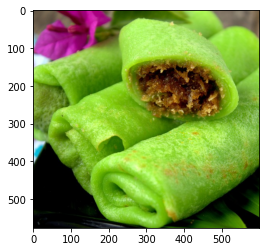

kue_dadar_gulung = 4.962470934576583%
kue_kastengel = 14.302863875738192%
kue_klepon = 19.997244638875035%
kue_lapis = 9.164770864680573%
kue_lumpur = 28.48824961027568%
kue_putri_salju = 8.477359871235358%
kue_risoles = 6.856692871899363%
kue_serabi = 7.750347332719218%
The predicted image is : kue_lumpur


In [13]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.pkl','rb'))

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
image = io.imread(url, as_gray=True)
image = transform.resize(image, (128, 128))  # Resizing gambar
fd = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False).reshape(1, -1)
probability=model.predict_proba(fd)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(fd)[0]])

This model learns from its mistake and rectifies them and does not repeat the same mistake again ;)